In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

Model je oblika y_hat = Theta0 + Theta1 * x
y_hat =  [0.14219055] + [[0.3225882]] *x


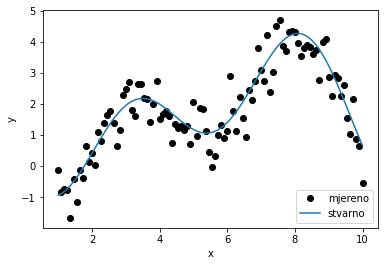

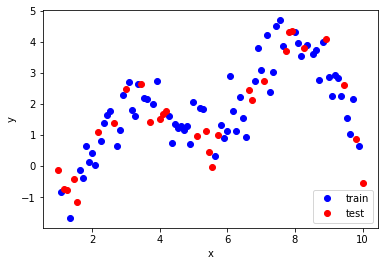

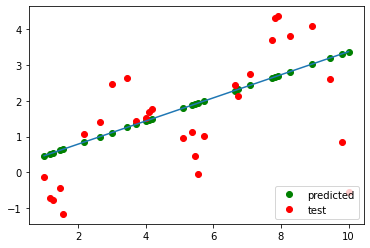

In [ ]:
def non_func(x):
	y = 1.6345 - 0.6235*np.cos(0.6067*x) - 1.3501*np.sin(0.6067*x) - 1.1622 * np.cos(2*x*0.6067) - 0.9443*np.sin(2*x*0.6067)
	return y

def add_noise(y):
    np.random.seed(14)
    varNoise = np.max(y) - np.min(y)
    y_noisy = y + 0.1*varNoise*np.random.normal(0,1,len(y))
    return y_noisy

x = np.linspace(1,10,100)
y_true = non_func(x)
y_measured = add_noise(y_true)

plt.figure(1)
plt.plot(x,y_measured,'ok',label='mjereno')
plt.plot(x,y_true,label='stvarno')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc = 4)

np.random.seed(12)
indeksi = np.random.permutation(len(x))
indeksi_train = indeksi[0:int(np.floor(0.7*len(x)))]
indeksi_test = indeksi[int(np.floor(0.7*len(x)))+1:len(x)]

x = x[:, np.newaxis]
y_measured = y_measured[:, np.newaxis]

xtrain = x[indeksi_train]
ytrain = y_measured[indeksi_train]

xtest = x[indeksi_test]
ytest = y_measured[indeksi_test]

plt.figure(2)
plt.plot(xtrain,ytrain,'ob',label='train')
plt.plot(xtest,ytest,'or',label='test')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc = 4)

linearModel = lm.LinearRegression()
linearModel.fit(xtrain,ytrain)

print('Model je oblika y_hat = Theta0 + Theta1 * x')
print('y_hat = ', linearModel.intercept_, '+', linearModel.coef_, '*x')

ytest_p = linearModel.predict(xtest)
MSE_test = mean_squared_error(ytest, ytest_p)

plt.figure(3)
plt.plot(xtest,ytest_p,'og',label='predicted')
plt.plot(xtest,ytest,'or',label='test')
plt.legend(loc = 4)

x_pravac = np.array([1,10])
x_pravac = x_pravac[:, np.newaxis]
y_pravac = linearModel.predict(x_pravac)
plt.plot(x_pravac, y_pravac)


In [ ]:
column_ones=np.ones(len(xtrain))
column_ones=column_ones[:,np.newaxis]
x_p=np.hstack((column_ones,xtrain))
transp=np.transpose(x_p)
invert=np.linalg.inv(np.dot(transp,x_p))
thetaCal=np.dot(np.dot(invert,transp),ytrain)
print(thetaCal)

[[0.14219055]
 [0.3225882 ]]


In [ ]:
def CalcPravac(x, th0, th1):
  return th0 + th1*x

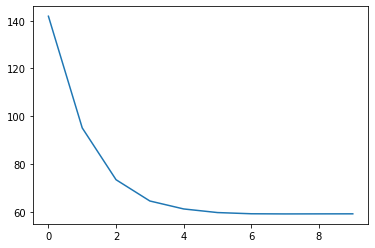

In [ ]:
alfa = 0.01
th = [0,0]
fun=[]
n=len(xtrain)
for i in range(0,2000):
  sumt1=0
  sumt2=0
  dis=0

  for j in range (0, n):
    sumt1= sumt1 + (CalcPravac(xtrain[j], th[0], th[1])-ytrain[j])*xtrain[j]/len(xtrain)
    sumt2= sumt2 + (CalcPravac(xtrain[j], th[0], th[1])-ytrain[j])/len(xtrain);
    dis=dis + abs(ytrain[j]-th[0]-th[1]*xtrain[j])
  
  fun.append(dis)
  th[0] =th[0] - alfa*sumt2;
  th[1] =th[1] - alfa*sumt1;
plt.plot(fun[:10])


In [ ]:
def non_func(x):
    y = 1.6345 - 0.6235*np.cos(0.6067*x) - 1.3501*np.sin(0.6067*x) - 1.1622 * np.cos(2*x*0.6067) - 0.9443*np.sin(2*x*0.6067)
    return y

def add_noise(y):
    np.random.seed(14)
    varNoise = np.max(y) - np.min(y)
    y_noisy = y + 0.1*varNoise*np.random.normal(0,1,len(y))
    return y_noisy

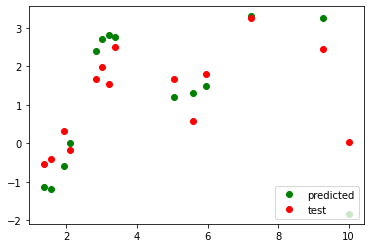

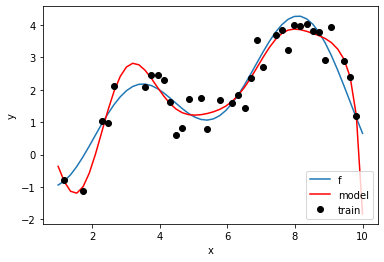

In [ ]:
x = np.linspace(1,10,50)
y_true = non_func(x)
y_measured = add_noise(y_true)

x = x[:, np.newaxis]
y_measured = y_measured[:, np.newaxis]

# make polynomial features
poly = PolynomialFeatures(degree=15)
xnew = poly.fit_transform(x)
    
np.random.seed(12)
indeksi = np.random.permutation(len(xnew))
indeksi_train = indeksi[0:int(np.floor(0.7*len(xnew)))]
indeksi_test = indeksi[int(np.floor(0.7*len(xnew)))+1:len(xnew)]

xtrain = xnew[indeksi_train,]
ytrain = y_measured[indeksi_train]

xtest = xnew[indeksi_test,]
ytest = y_measured[indeksi_test]

linearModel = lm.LinearRegression()
linearModel.fit(xtrain,ytrain)

ytest_p = linearModel.predict(xtest)
MSE_test = mean_squared_error(ytest, ytest_p)

plt.figure(1)
plt.plot(xtest[:,1],ytest_p,'og',label='predicted')
plt.plot(xtest[:,1],ytest,'or',label='test')
plt.legend(loc = 4)

#pozadinska funkcija vs model
plt.figure(2)
plt.plot(x,y_true,label='f')
plt.plot(x, linearModel.predict(xnew),'r-',label='model')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(xtrain[:,1],ytrain,'ok',label='train')
plt.legend(loc = 4)


Srednja kvadratna pogreška na skupu za učenje: [4.76850049e+00 8.72085970e-01 2.03563382e+02 1.85572348e+04
 1.46011345e+06 1.17708401e+08 9.78573223e+09 8.33505999e+11
 7.23362371e+13 6.37088287e+15 5.67762548e+17 5.10855360e+19
 4.63291498e+21 4.22918875e+23 3.88192263e+25 3.57977288e+27]
Srednja kvadratna pogreška na skupu za testiranje: [1.88772994e+00 1.45904715e+00 1.52663795e+02 1.37910029e+04
 1.22791062e+06 1.12981687e+08 1.06175099e+10 1.01052901e+12
 9.69860479e+13 9.36521662e+15 9.08674855e+17 8.85157973e+19
 8.65167805e+21 8.48109108e+23 8.33517820e+25 8.21019343e+27]
Koeficijent determinacije na skupu za učenje [-1.23929618e+00  5.90466903e-01 -9.45937203e+01 -8.71350992e+03
 -6.85670830e+05 -5.52760701e+07 -4.59539698e+09 -3.91415876e+11
 -3.39692235e+13 -2.99177774e+15 -2.66622286e+17 -2.39898571e+19
 -2.17562498e+21 -1.98603444e+23 -1.82295766e+25 -1.68106761e+27]
Koeficijent determinacije na skupu za testiranje [-8.06864514e-01 -3.96545380e-01 -1.45124077e+02 -1.31992

<ipython-input-61-01512046a3c3>:41: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(e);
/usr/local/lib/python3.8/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


ValueError: ignored

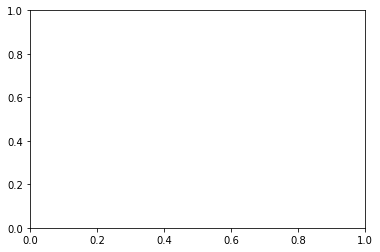

In [ ]:
sum=0
y_crtica=0
for i in range (0, len(xtrain)):
  sum += pow((ytrain[i]-th[0]-th[1]*xtrain[i]),2)
  y_crtica+=ytrain[i]
  mse_train=(1./len(xtrain))*sum;
  y_crtica=y_crtica/len(ytrain)

sum1=0
y_crtica1=0
for i in range (0, len(xtest)):
  sum1 += pow((ytest[i]-th[0]-th[1]*xtest[i]),2)
  y_crtica1+=ytest[i]
  y_crtica1=y_crtica1/len(ytest)
mse_test=(1./len(xtest))*sum1;

print( 'Srednja kvadratna pogreška na skupu za učenje:',mse_train)
print('Srednja kvadratna pogreška na skupu za testiranje:',mse_test)

nazivnik=0
for i in range (0, len(ytrain)):
  nazivnik+= (ytrain[i]- y_crtica)
  R2=1.-(sum/nazivnik)
print ('Koeficijent determinacije na skupu za učenje',R2)

nazivnik1=0
for i in range (0, len(ytest)):
  nazivnik1+= (ytest[i]- y_crtica1)
  R2=1.-(sum1/nazivnik1)

print ('Koeficijent determinacije na skupu za testiranje',R2)

""" ZADATAK 5"""
"""Prikažite reziduale (4-16) na skupu za učenje za zadatak 1."""
e=[];
for i in range(len(xtrain)):
  e.append(ytrain[i]-th[0]-th[1]*xtrain[i])

plt.figure()
plt.stem(e);
plt.show()